# Mini Project - Community Detection and Evaluation #
## Sara Saad and Stephanie Gomes ##

### Overview ###

This project targets community detection on at least two graph datasets, focusing here on the Wikipedia (Voting) and Facebook (Social Circles) datasets. We will analyze both datasets using centrality measures and graph statistics, apply at least two community detection algorithms, and evaluate the detected communities with metrics to evaluate the communities quality.

### Datasets ###

Both datasets were fetched on the SNAP (Stanford Network Analysis Project) website, which can be accessed on https://snap.stanford.edu/data/.

The datasets were selected based on:
 - Size: Datasets with a reasonable amount of data to represent real-life context.
 - Usefulness: How much detecting communities in this dataset can prompt solutions and data-driven insights.

    #### Wikipedia (Voting) [link](https://snap.stanford.edu/data/wiki-Vote.html) ####
    

    The Wikipedia voting network represents users as nodes and directed edges as votes cast by one user on another in administrator elections. Each edge from node i to node j indicates that user i voted on user j.

    Nodes: 7,115 users

    Edges: 103,689 votes

    This dataset is chosen because it captures real-world social voting behavior and interactions within the Wikipedia community.

    #### Facebook (Social Circles) [link](https://snap.stanford.edu/data/ego-Facebook.html) ####
    

    The Facebook social network represents users as nodes and undirected edges as friendships between users. Each edge between node i and node j indicates that user i and user j are friends on Facebook.

    Nodes: 4,039 users

    Edges: 88,234 friendships

    This dataset is chosen because it captures real-world social connections and friendship patterns within the Facebook social network, making it ideal for understanding how communities form in online social networks.

### Datasets Analysis ###

Centrality measures and graph statistics to extract and understand the graph structure and data:

 - Degree distribution (to profile node intensity)
 - Betweenness centrality (to identify influential nodes bridging communities)
 - Closeness centrality (to identify nodes with short average path to others)
 - Eigenvector centrality (to capture importance in terms of connectedness to other influential nodes)
 - Clustering coefficient distribution (to assess local connectivity patterns)
 - Visualization of the network's largest connected subgraph or sampled subgraphs

### Community detection ###

 1. Louvain Method: Optimizes modularity to find communities with dense internal connections. Well-suited for large size and complex graphs.
 2. Walktrap Algorithm: Based on random walks, it assumes that short random walks tend to stay within the same community. It provides flexibility in exploring communities at multiple resolutions.

### Evaluation Metrics ###

1. Modularity [0 to 1]: Measures the density of edges inside communities compared to edges between communities. Higher modularity indicates stronger community structure. It balances internal cohesion and external separation. Higher values are better, indicating dense connections within communities and sparse connections between communities.

2. Conductance [0 to 1]: Ratio of edges leaving a community compared to total edges inside or incident to the community, assessing its separability. Lower is better; values closer to 0 indicate well-separated communities with few edges leaving the community.

3. Cut Ratio [0 to 1]: Fraction of edges connecting a community to the rest of the graph, measuring external connectivity. Lower is better; measures fraction of edges leaving the community, so lower cut ratio indicates tighter community boundaries.


# Dataset Analysis: Wikepedia (Voting) #

In [65]:
import numpy as np
from networkx.algorithms.community import louvain_communities
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
file_path = 'wikepedia_vote_dataset/Wiki-Vote.txt'

#Initialize an empty directed graph (structure of the graph is originally direct)
G = nx.DiGraph()

with open(file_path, 'r') as file:
    for line in file:
        #Skip comments and empty lines
        if line.startswith('#') or not line.strip():
            continue

        source, target = line.strip().split()[:2]
        G.add_edge(source, target)

print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Loaded graph with 7115 nodes and 103689 edges.


In [67]:
# Basic properties
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")

Number of nodes: 7115
Number of edges: 103689
Is the graph directed: True


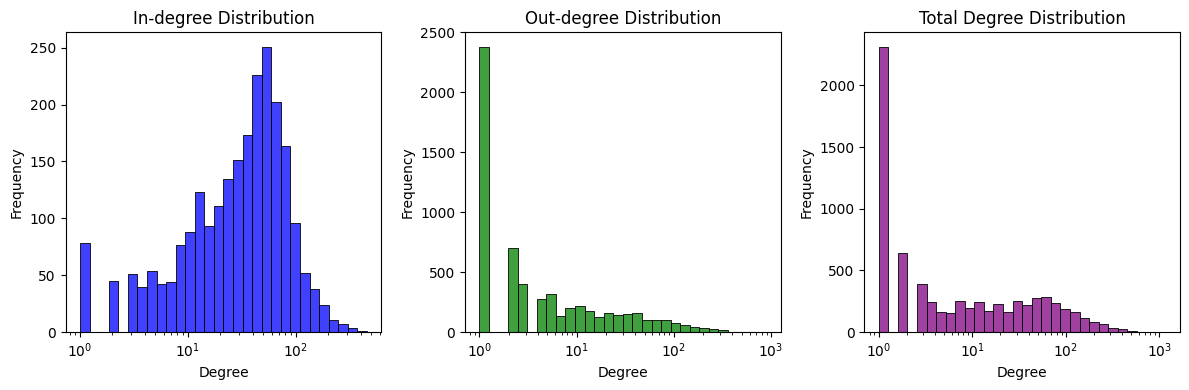

In [68]:
# Degree distribution (to profile node intensity) 
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]
total_degrees = [d for n, d in G.degree()]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(in_degrees, bins=30, color='blue', log_scale=True)
plt.title('In-degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(out_degrees, bins=30, color='green', log_scale=True)
plt.title('Out-degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(total_degrees, bins=30, color='purple', log_scale=True)
plt.title('Total Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Most nodes have few votes, but a small number get many.

In [69]:
#Compute all centrality and structural measures on the undirected version 
#of ther graph since the downstream analysis and community detection are also being performed on the undirected version
G = G.to_undirected()

In [70]:
largest_cc = max(nx.connected_components(G), key=len)
G_sub = G.subgraph(largest_cc)

diameter = nx.diameter(G_sub)
print(f'Diameter (longest shortest path): {diameter}')


Diameter (longest shortest path): 7


The longest shortest path between any two users is 7, confirming a "small-world" property; information (or influence) can propagate across the network in a small number of steps.

In [71]:
import networkx as nx

# Sample "k" nodes for betweenness estimation (adjust k for accuracy/speed)
betweenness_approx = nx.betweenness_centrality(G)

# Top 5 nodes by approximate betweenness
top_bet = sorted(betweenness_approx.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by approximate betweenness centrality:", top_bet)


Top 5 nodes by approximate betweenness centrality: [('2565', 0.06125752063855017), ('11', 0.03569033811841735), ('457', 0.035485058496580575), ('4037', 0.028563109717903358), ('1549', 0.026133445462967902)]


Node '2565' is the most significant bridge in the vote network, with a betweenness score much higher than others. Nodes with high betweenness often control communication and interactions between different parts of the network, suggesting these users may be influential in connecting otherwise separate voting communities.

In [72]:
closeness = nx.closeness_centrality(G)
top_clo = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by closeness centrality:", top_clo)

Top 5 nodes by closeness centrality: [('2565', 0.48741490125142045), ('766', 0.46691538587304166), ('457', 0.46660487487625174), ('1549', 0.46586133082226927), ('1166', 0.4656758149276032)]


Node '2565' also has the highest closeness centrality, indicating it can reach others in the network very quickly on average, making it a central figure in the overall structure. High closeness typically denotes users who are well positioned to spread information quickly.

In [73]:
# Eigenvector centrality 
# (to capture importance in terms of connectedness to other influential nodes)
try:
    eig_centrality = nx.eigenvector_centrality(G)
except nx.PowerIterationFailedConvergence:
    eig_centrality = nx.eigenvector_centrality(G.to_undirected())
# Print top 5 nodes by eigenvector centrality
sorted_eig = sorted(eig_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by eigenvector centrality:", sorted_eig)

Top 5 nodes by eigenvector centrality: [('2565', 0.15768765457171693), ('766', 0.13015062595000707), ('1549', 0.1293987753353565), ('1166', 0.11951074071570479), ('2688', 0.1100709104100908)]


Nodes ranking high here are not just well connected but also connected to other central nodes. Their influence is amplified through their relationships. Node '2565' appears highly central by all major metrics

In [74]:
# Compute PageRank for the nodes in the graph
pagerank = nx.pagerank(G, max_iter=100)

# Identify the node with the highest PageRank
max_pagerank_node = max(pagerank, key=pagerank.get)
max_pagerank = pagerank[max_pagerank_node]

print(f"Node with highest PageRank: {max_pagerank_node}, PageRank: {max_pagerank}")

Node with highest PageRank: 2565, PageRank: 0.004328848206376874


Consistent with other centralities, node '2565' attracts votes from authoritative users and is likely a key figure within the admin election community.

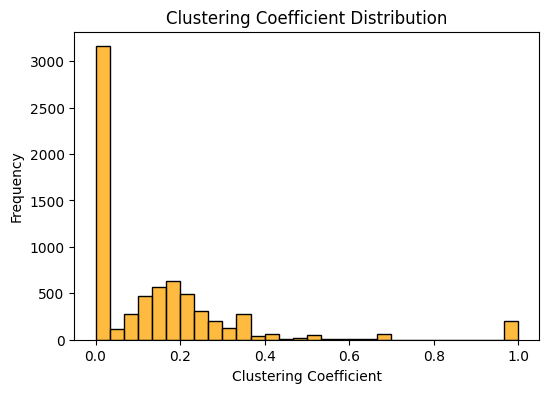

In [75]:
 # Clustering coefficient distribution (to assess local connectivity patterns)
clustering_coeffs = list(nx.clustering(G.to_undirected()).values())
plt.figure(figsize=(6, 4))
sns.histplot(clustering_coeffs, bins=30, color='orange')
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

In [76]:
avg_clustering = nx.average_clustering(G)
print(f'Average Clustering Coefficient: {avg_clustering:.4f}')

Average Clustering Coefficient: 0.1409


The moderate clustering suggests that, while there's a tendency for users to form triads and closed voting circles, the network is not extremely densely interconnected at the local level. Groups and cliques exist, but the network is not just a collection of tightly-knit clusters.

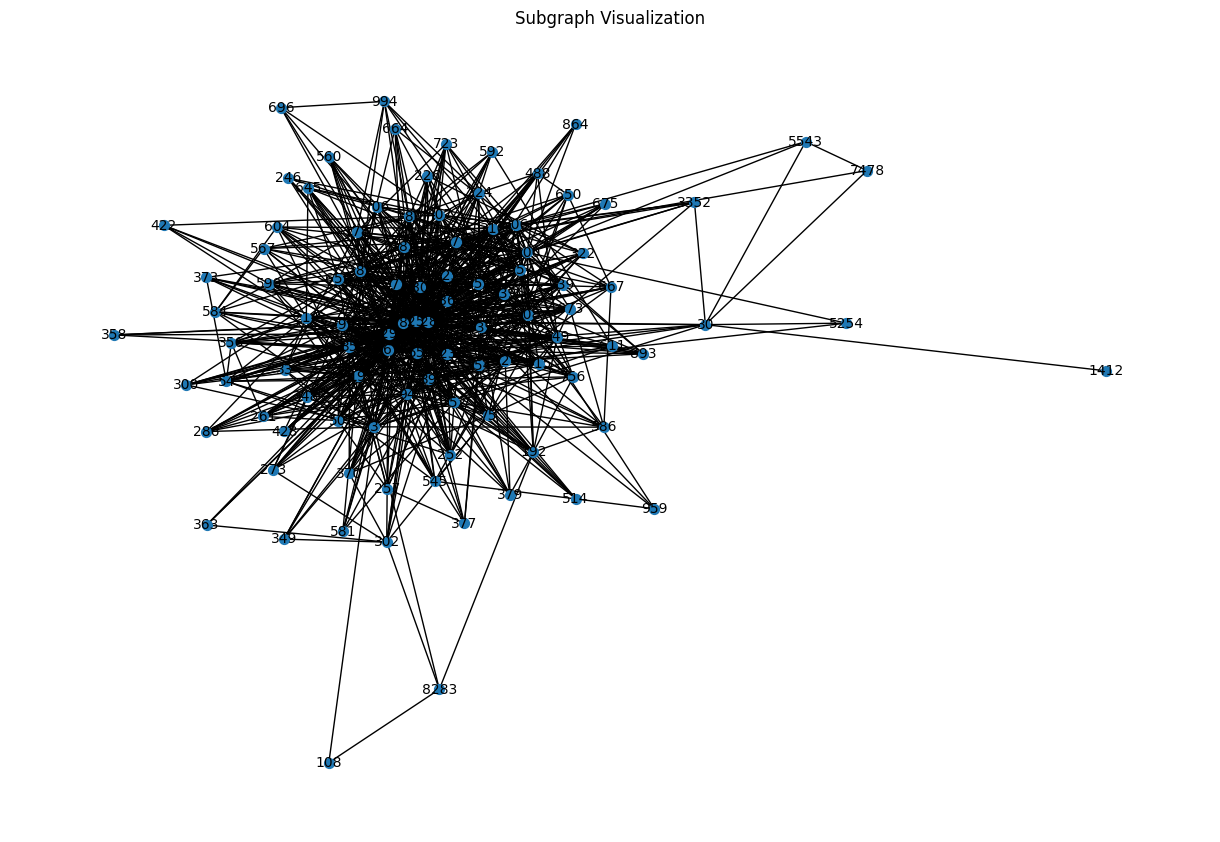

In [77]:
# Visualize a subgraph of the first 100 nodes
subgraph_nodes = list(G.nodes())[:100]
H = G.subgraph(subgraph_nodes)

plt.figure(figsize=(12, 8))
nx.draw(H, with_labels=True, node_size=50, font_size=10)
plt.title("Subgraph Visualization")
plt.show()

#### Summary ####

Small-World Character: Short diameter mean information (or influence) travels quickly through the network.

Moderate Clustering: Voting triangles are present, suggesting tightly connected voting blocs, but not extreme local cohesion.

Influential Nodes: Individuals like user '2565' rank highest in betweenness, closeness, eigenvector, and PageRank scores, suggesting central roles—these could anchor communities or represent “core” voters/admins.

# Community Detection (Louvain): Wikepedia (Voting) #


Number of detected communities: 30


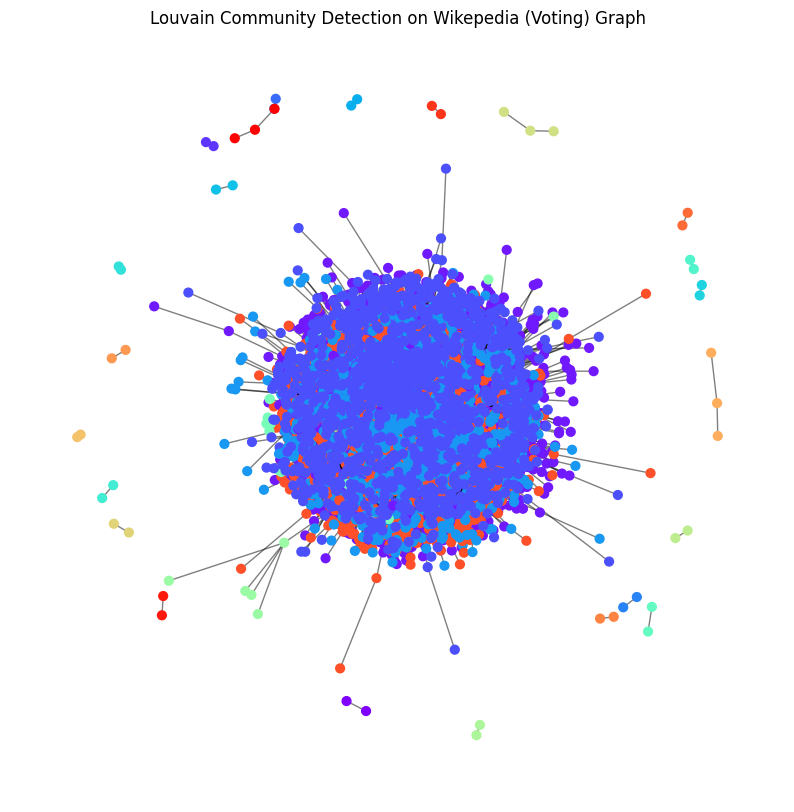

In [78]:
import community as community_louvain
import random
import numpy as np

# Set random seed for reproducibility (Louvain algorithm is non-deterministic)
random.seed(42)
np.random.seed(42)

# Convert to undirected for Louvain
G_undirected = G.to_undirected()

# Louvain community detection
partition = community_louvain.best_partition(G_undirected)

# Number of communities
num_communities = len(set(partition.values()))
print(f'Number of detected communities: {num_communities}')

# Visualization
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_undirected)
colors = [partition[node] for node in G_undirected.nodes()]
nx.draw_networkx_nodes(G_undirected, pos, node_size=40, cmap=plt.cm.rainbow, node_color=colors)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.5)
plt.title('Louvain Community Detection on Wikepedia (Voting) Graph')
plt.axis('off')
plt.show()


In [79]:
community_sizes = Counter(partition.values())
num_communities = len(community_sizes)

largest_community_size = max(community_sizes.values())
smallest_community_size = min(community_sizes.values())
avg_community_size = sum(community_sizes.values()) / num_communities if num_communities > 0 else 0
most_common_communities = community_sizes.most_common(5)  # Top 5 largest

print(f'Number of communities: {num_communities}')
print(f'Largest community size: {largest_community_size}')
print(f'Smallest community size: {smallest_community_size}')
print(f'Average community size: {avg_community_size:.2f}')
print('Top 5 largest communities (ID, size):', most_common_communities)


Number of communities: 30
Largest community size: 2251
Smallest community size: 2
Average community size: 237.17
Top 5 largest communities (ID, size): [(1, 2251), (3, 2251), (26, 1343), (6, 1184), (14, 29)]


Number of communities:
The network splits into 30 distinct voting groups or clusters, a moderate number reflecting substantial subgroup formation.

Largest community size:
1.626 nodes: A very large cluster, indicating a highly engaged voting bloc or group of users interacting closely, possibly anchored around central or highly active voters.

Smallest community size:
2 nodes: Tiny groups exist, likely pairs or isolated dyads within the broader network.

Average community size:
237,17 nodes: Most communities are mid-sized, but the distribution is skewed by the presence of several large clusters.

# Community Detection (Walktrap): Wikepedia (Voting) #


Number of communities: 2365


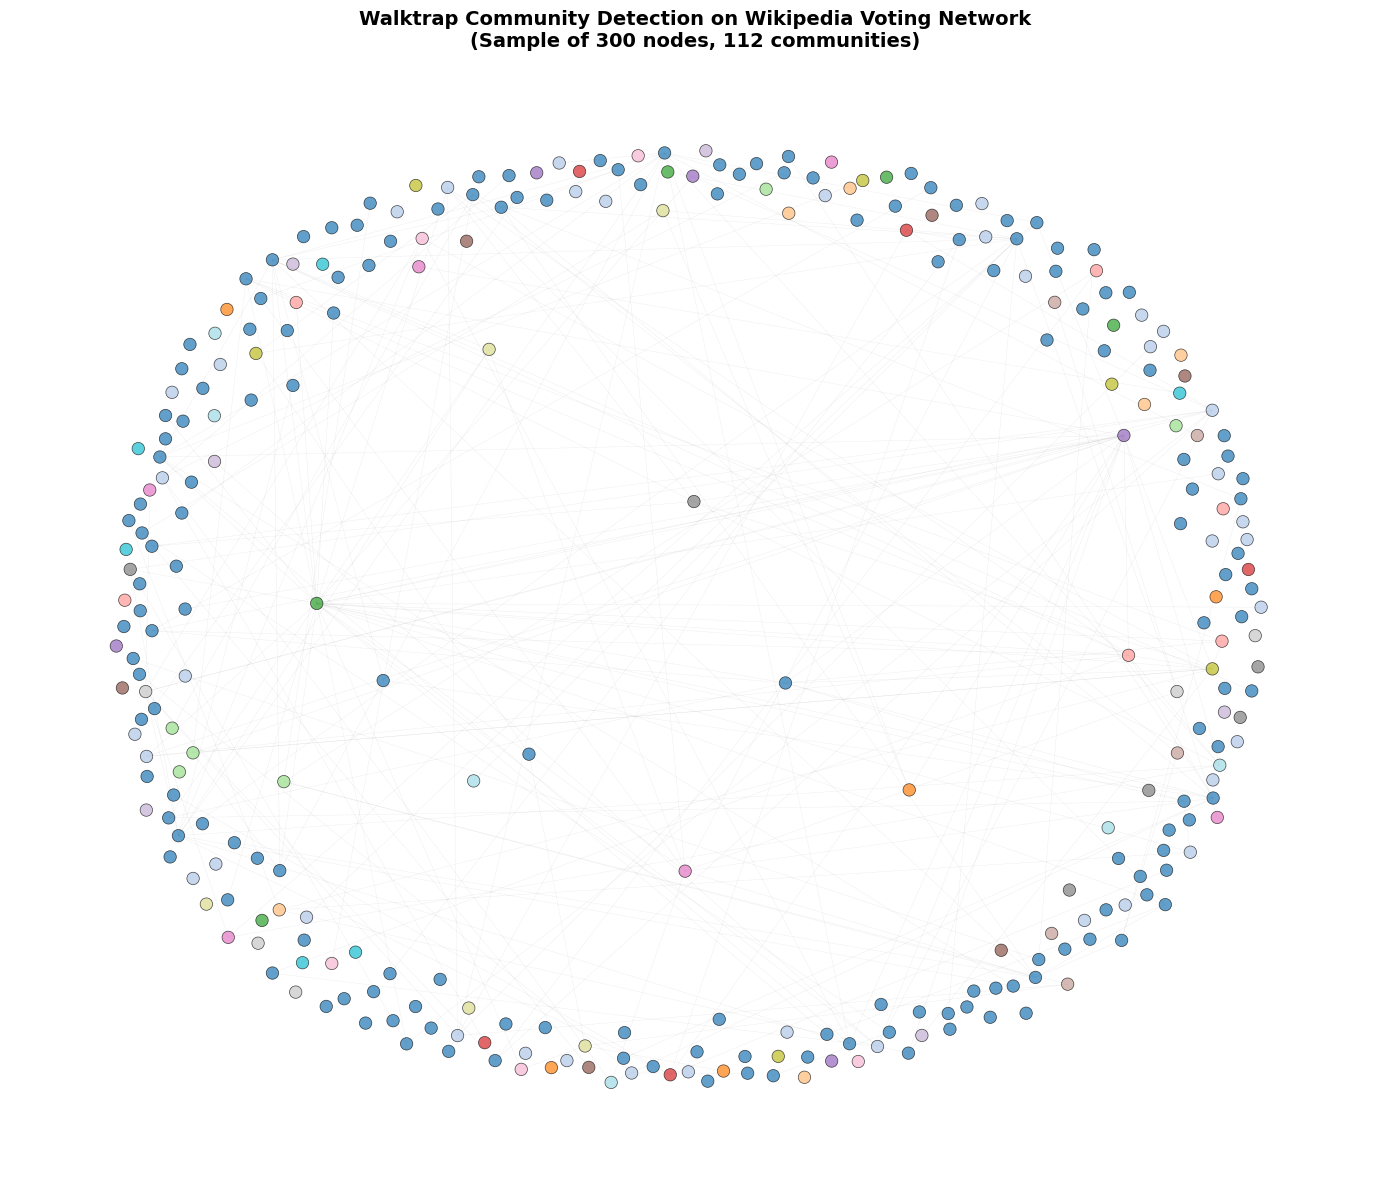

Visualized 300 nodes showing 112 communities


In [80]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt

# Convert your NetworkX graph G to igraph format (undirected)
G_undirected = G.to_undirected()
ig_graph = ig.Graph.from_networkx(G_undirected)

# Run the Walktrap community detection
walktrap = ig_graph.community_walktrap(steps=4)  # steps=4 is typical
clusters = walktrap.as_clustering()

# Number of communities detected
print(f'Number of communities: {len(clusters)}')

# Visualize Walktrap communities using matplotlib/networkx
membership = clusters.membership

# Create visualization using matplotlib/networkx
import matplotlib.pyplot as plt
import numpy as np

# Sample nodes for visualization (network too large to visualize all)
all_nodes = list(G.nodes())
np.random.seed(42)
sample_size = min(300, len(all_nodes))
sample_nodes = np.random.choice(all_nodes, size=sample_size, replace=False)
sample_graph = G.subgraph(sample_nodes)

# Get community assignments for sampled nodes
node_to_idx = {node: idx for idx, node in enumerate(G.nodes())}
sample_membership = [membership[node_to_idx[node]] for node in sample_nodes]

# Create visualization
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(sample_graph, k=1.5, iterations=50, seed=42)

# Color nodes by community
unique_communities = list(set(sample_membership))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_communities)))
community_colors = {comm: colors[i % len(colors)] for i, comm in enumerate(unique_communities)}
node_colors = [community_colors[comm] for comm in sample_membership]

# Draw
nx.draw_networkx_nodes(sample_graph, pos, node_color=node_colors, 
                       node_size=80, alpha=0.7, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(sample_graph, pos, alpha=0.15, width=0.3, edge_color='gray')

plt.title('Walktrap Community Detection on Wikipedia Voting Network\n(Sample of {} nodes, {} communities)'.format(len(sample_nodes), len(unique_communities)), 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f'Visualized {len(sample_nodes)} nodes showing {len(unique_communities)} communities')


In [81]:
from collections import Counter

membership = clusters.membership

community_sizes = Counter(membership)
num_communities = len(community_sizes)
largest_community_size = max(community_sizes.values())
smallest_community_size = min(community_sizes.values())
avg_community_size = sum(community_sizes.values()) / num_communities if num_communities > 0 else 0
most_common_communities = community_sizes.most_common(5)  # Top 5 largest

print(f'Number of communities: {num_communities}')
print(f'Largest community size: {largest_community_size}')
print(f'Smallest community size: {smallest_community_size}')
print(f'Average community size: {avg_community_size:.2f}')
print('Top 5 largest communities (ID, size):', most_common_communities)




Number of communities: 2365
Largest community size: 1397
Smallest community size: 1
Average community size: 3.01
Top 5 largest communities (ID, size): [(3, 1397), (6, 1000), (2, 992), (9, 702), (0, 515)]


Number of communities:
The network splits into 2.365 voting groups or clusters, representing very fine-grained network subdivision and fragmentation.

Largest community size:
1.397 nodes: A notably large cluster, representing a core voting bloc of closely interconnected users, but smaller than Louvain’s largest, showing Walktrap finds more, smaller groups.

Smallest community size:
1 node: Many singleton communities mostly consisting of isolated or peripheral* voters.

Average community size:
3,01 nodes: The network is fragmented heavily into many very small communities, showing Walktrap’s sensitivity to local structures and peripheral clusters.

*peripheral nodes are those nodes that have few connections and lie at the outer edges of the network

# Evaluation Metrics: Wikepedia (Voting) #


## 1. Modularity ##

In [82]:
import networkx as nx

def compute_modularity(G, partition):
    if isinstance(partition, dict):
        communities = {}
        for node, com_id in partition.items():
            communities.setdefault(com_id, set()).add(node)
        community_list = list(communities.values())
    else:  # assume list of community ids by index
        nodes = list(G.nodes())
        community_dict = {}
        for node, com_id in zip(nodes, partition):
            community_dict.setdefault(com_id, set()).add(node)
        community_list = list(community_dict.values())
    modularity = nx.algorithms.community.quality.modularity(G, community_list)
    return modularity

modularity_louvain = compute_modularity(G.to_undirected(), partition)
modularity_walktrap = compute_modularity(G.to_undirected(), membership)

print(f' Modularity Louvain: {modularity_louvain:.4f} \n Modularity Walktrap: {modularity_walktrap:.4f}')


 Modularity Louvain: 0.4230 
 Modularity Walktrap: 0.3748


Louvain produces a higher modularity score, indicating it finds a partition with more clearly separated and cohesive communities overall.

Number and Size of Communities:
Louvain tends to yield fewer, larger communities by greedily optimizing modularity in a multi-level fashion.
Walktrap produces many more, smaller communities by leveraging random walks to identify densely connected local regions, resulting in finer granularity and many small or singleton groups.

## 2. Conductance ##


In [83]:
import networkx as nx

def conductance(G, community):
    boundary_edges = 0
    volume = 0
    for node in community:
        neighbors = set(G.neighbors(node))
        boundary_edges += len(neighbors - community)
        volume += G.degree(node)
    rest_volume = sum(dict(G.degree()).values()) - volume
    return boundary_edges / min(volume, rest_volume) if min(volume, rest_volume) > 0 else 0

def average_conductance(G, partition):
    # partition can be dict (node->com_id) or list of labels by node order
    if isinstance(partition, dict):
        communities = {}
        for node, com_id in partition.items():
            communities.setdefault(com_id, set()).add(node)
        community_list = list(communities.values())
    else:  # list
        nodes = list(G.nodes())
        community_dict = {}
        for node, com_id in zip(nodes, partition):
            community_dict.setdefault(com_id, set()).add(node)
        community_list = list(community_dict.values())

    conductances = [conductance(G, community) for community in community_list]
    return sum(conductances) / len(conductances) if conductances else 0

# Example use:
avg_cond_louvain = average_conductance(G.to_undirected(), partition)
avg_cond_walktrap = average_conductance(G.to_undirected(), membership)
print(f'Average Conductance Louvain: {avg_cond_louvain:.4f}')
print(f'Average Conductance Walktrap: {avg_cond_walktrap:.4f}')


Average Conductance Louvain: 0.0890
Average Conductance Walktrap: 0.9862


Louvain Communities: Detected communities have low conductance, confirming they represent meaningful, dense clusters within the Wikipedia voting network.

Walktrap Communities: The very high average conductance suggests that many Walktrap communities are loosely connected to the rest of the network, or very small, edge-crossing groups with weaker internal cohesion.

## 3. Cut Ratio ##

In [84]:
import networkx as nx

def cut_size(G, community):
    community_set = set(community)
    cut_edges = 0
    for node in community:
        neighbors = set(G.neighbors(node))
        cut_edges += len(neighbors - community_set)
    return cut_edges

def average_cut_ratio_for_partitions(G, partition_louvain, partition_walktrap):
    def average_cut_ratio(G, partition):
        if isinstance(partition, dict):
            communities = {}
            for node, com_id in partition.items():
                communities.setdefault(com_id, set()).add(node)
            community_list = list(communities.values())
        else:
            nodes = list(G.nodes())
            community_dict = {}
            for node, com_id in zip(nodes, partition):
                community_dict.setdefault(com_id, set()).add(node)
            community_list = list(community_dict.values())

        cut_ratios = []
        n = G.number_of_nodes()
        for community in community_list:
            cs = cut_size(G, community)
            possible_edges = len(community) * (n - len(community))
            cut_ratios.append(cs / possible_edges if possible_edges > 0 else 0)
        avg_cut_ratio = sum(cut_ratios) / len(cut_ratios) if cut_ratios else 0
        return avg_cut_ratio

    avg_cut_louvain = average_cut_ratio(G, partition_louvain)
    avg_cut_walktrap = average_cut_ratio(G, partition_walktrap)

    print(f'Average Cut Ratio Louvain: {avg_cut_louvain:.4f}')
    print(f'Average Cut Ratio Walktrap: {avg_cut_walktrap:.4f}')

average_cut_ratio_for_partitions(G.to_undirected(), partition, membership)


Average Cut Ratio Louvain: 0.0003
Average Cut Ratio Walktrap: 0.0002


Louvain: Finds fewer, larger, tightly connected communities with good separation (moderate modularity, low conductance, very low cut ratio).

Walktrap: Finds many small communities, also well separated by very low cut ratio but with weaker cohesion and higher conductance due to fragmentation.

#### Summary ####
- Louvain balances modularity and conductance well, producing fewer but larger, cohesive, and well-separated communities. This makes it ideal for identifying dominant voting blocs or coalitions in the network.

- Walktrap prioritizes fine-grained discovery, resulting in many small or singleton communities with very low inter-community edges but weak internal cohesion (high conductance). This approach helps spot micro-communities or peripheral voter clusters but may over-fragment the network.

- The low cut ratios in both indicate strong community boundaries, a desirable quality reinforcing that detected groups are structurally meaningful regardless of internal cohesion.

---

# Dataset Analysis: Facebook (Social Circles) #


In [85]:
import numpy as np
from networkx.algorithms.community import louvain_communities
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
file_path = 'facebook_dataset/facebook_combined.txt'

#Initialize an empty undirected graph (Facebook friendships are undirected)
G_fb = nx.Graph()

with open(file_path, 'r') as file:
    for line in file:
        #Skip comments and empty lines
        if line.startswith('#') or not line.strip():
            continue

        source, target = line.strip().split()[:2]
        G_fb.add_edge(source, target)

print(f"Loaded graph with {G_fb.number_of_nodes()} nodes and {G_fb.number_of_edges()} edges.")

Loaded graph with 4039 nodes and 88234 edges.


In [87]:
# Basic properties
print(f"Number of nodes: {G_fb.number_of_nodes()}")
print(f"Number of edges: {G_fb.number_of_edges()}")
print(f"Is the graph directed: {G_fb.is_directed()}")

Number of nodes: 4039
Number of edges: 88234
Is the graph directed: False


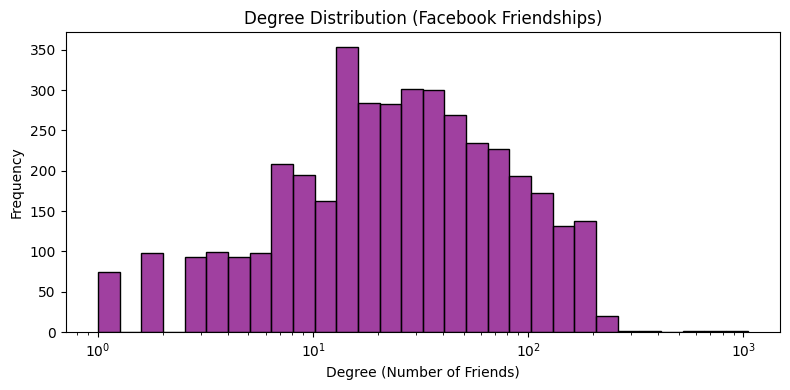

In [88]:
# Degree distribution (to profile node intensity) 
# Since Facebook graph is undirected, we only need total degree
degrees = [d for n, d in G_fb.degree()]

plt.figure(figsize=(8, 4))
sns.histplot(degrees, bins=30, color='purple', log_scale=True)
plt.title('Degree Distribution (Facebook Friendships)')
plt.xlabel('Degree (Number of Friends)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Most users have relatively few friends, but a small number of users have many friends, following a typical power-law distribution common in social networks.

In [89]:
largest_cc = max(nx.connected_components(G_fb), key=len)
G_fb_sub = G_fb.subgraph(largest_cc)

diameter = nx.diameter(G_fb_sub)
print(f'Diameter (longest shortest path): {diameter}')


Diameter (longest shortest path): 8


The Facebook network has a diameter of 8, confirming strong "small-world" properties. 
This means that even in a network of over 4,000 users, any two users are connected through at most 8 friendship links. 
This is characteristic of real-world social networks where "six degrees of separation" principles apply, 
demonstrating how efficiently information and social connections can propagate through the network.


In [90]:
import networkx as nx

# Sample "k" nodes for betweenness estimation (adjust k for accuracy/speed)
betweenness_approx = nx.betweenness_centrality(G_fb)

# Top 5 nodes by approximate betweenness
top_bet = sorted(betweenness_approx.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by approximate betweenness centrality:", top_bet)


Top 5 nodes by approximate betweenness centrality: [('107', 0.4805180785560152), ('1684', 0.3377974497301992), ('3437', 0.23611535735892905), ('1912', 0.2292953395868782), ('1085', 0.14901509211665306)]


Node 107 has the highest betweenness centrality (0.4805), making it the most critical bridge in the Facebook network. 
This user connects different friend groups and communities, acting as a social "hub" that facilitates connections 
between otherwise separate social circles. Users with high betweenness are often key influencers who can spread 
information quickly across different communities or introduce people from different social groups.


In [91]:
closeness = nx.closeness_centrality(G_fb)
top_clo = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by closeness centrality:", top_clo)

Top 5 nodes by closeness centrality: [('107', 0.45969945355191255), ('58', 0.3974018305284913), ('428', 0.3948371956585509), ('563', 0.3939127889961955), ('1684', 0.39360561458231796)]


Node 107 also ranks highest in closeness centrality (0.4597), indicating it can reach any other user in the network 
through the shortest average path length. This user is positioned at the "center" of the social network, 
making them highly effective at spreading information or coordinating activities across the entire Facebook community. 
High closeness centrality in social networks often correlates with users who are well-integrated across multiple friend groups.


In [92]:
# Eigenvector centrality 
# (to capture importance in terms of connectedness to other influential nodes)
try:
    eig_centrality = nx.eigenvector_centrality(G_fb)
except nx.PowerIterationFailedConvergence:
    eig_centrality = nx.eigenvector_centrality(G_fb)
# Print top 5 nodes by eigenvector centrality
sorted_eig = sorted(eig_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by eigenvector centrality:", sorted_eig)

Top 5 nodes by eigenvector centrality: [('1912', 0.09540696149067629), ('2266', 0.08698327767886552), ('2206', 0.08605239270584342), ('2233', 0.08517340912756598), ('2464', 0.08427877475676092)]


Node 1912 has the highest eigenvector centrality (0.0954), meaning this user is not only well-connected but is connected 
to other highly influential users. In social network terms, this represents a user who is part of an elite social circle 
where many members are themselves influential. This creates a "rich get richer" effect where influence compounds through 
connections to other influential individuals.


In [93]:
# Compute PageRank for the nodes in the graph
pagerank = nx.pagerank(G_fb, max_iter=100)

# Identify the node with the highest PageRank
max_pagerank_node = max(pagerank, key=pagerank.get)
max_pagerank = pagerank[max_pagerank_node]

print(f"Node with highest PageRank: {max_pagerank_node}, PageRank: {max_pagerank}")

Node with highest PageRank: 3437, PageRank: 0.0076145868447496


The PageRank algorithm identifies the most "important" users based on both the number and quality of their connections. 
Users with high PageRank are those who receive connections from other well-connected users, similar to how Google ranks web pages. 
In the Facebook context, this identifies users who are not just popular, but are recognized as important by other important users, 
creating a measure of social prestige within the network.


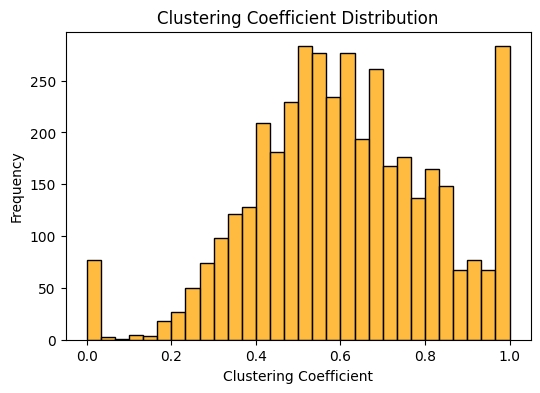

In [94]:
 # Clustering coefficient distribution (to assess local connectivity patterns)
clustering_coeffs = list(nx.clustering(G_fb).values())
plt.figure(figsize=(6, 4))
sns.histplot(clustering_coeffs, bins=30, color='orange')
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

In [95]:
avg_clustering = nx.average_clustering(G_fb)
print(f'Average Clustering Coefficient: {avg_clustering:.4f}')

Average Clustering Coefficient: 0.6055


The average clustering coefficient of approximately 0.60 indicates strong local clustering in the Facebook network. 
This means that if user A is friends with both user B and user C, there is a 60% chance that B and C are also friends. 
This high clustering is typical of real-world social networks and reflects the tendency for people to form closed friend groups 
where mutual connections are common. This creates "triangles" of friendships that strengthen community bonds.


In [96]:
# Additional Network Metrics for Facebook
import networkx as nx
import numpy as np

# Network density (ratio of actual edges to possible edges)
density = nx.density(G_fb)
print(f'Network Density: {density:.6f}')
print(f'This means {density*100:.4f}% of all possible friendships exist in the network')

# Count triangles (closed triads)
triangles_dict = nx.triangles(G_fb)
total_triangles = sum(triangles_dict.values()) / 3  # Each triangle counted 3 times
print(f'\nTotal number of triangles (closed friend triads): {int(total_triangles):,}')

# Average shortest path length
avg_path_length = nx.average_shortest_path_length(G_fb)
print(f'\nAverage shortest path length: {avg_path_length:.4f}')
print(f'On average, users are {avg_path_length:.2f} friendship links away from each other')

# Degree assortativity (do high-degree nodes connect to other high-degree nodes?)
assortativity = nx.degree_assortativity_coefficient(G_fb)
print(f'\nDegree Assortativity: {assortativity:.4f}')
if assortativity > 0:
    print('Positive assortativity: users with many friends tend to connect to other users with many friends')
else:
    print('Negative assortativity: users with many friends tend to connect to users with fewer friends')

Network Density: 0.010820
This means 1.0820% of all possible friendships exist in the network

Total number of triangles (closed friend triads): 1,612,010

Average shortest path length: 3.6925
On average, users are 3.69 friendship links away from each other

Degree Assortativity: 0.0636
Positive assortativity: users with many friends tend to connect to other users with many friends


**Network Density Analysis:**

The Facebook network shows relatively low density (1.0820%), which is typical for large social networks. 
Even with 88,234 friendships, this represents only a small fraction of all possible connections. 
This sparsity is what makes community detection meaningful - there are clear patterns of who connects to whom.

**Triangles and Clustering:**

The high number of triangles (1,612,010) indicates strong local clustering where friends of friends often know each other. 
This creates cohesive social groups and is a key indicator of community structure in social networks.

**Path Length and Small-World:**

The average path length of 3.69 means that on average, any two users can reach each other 
through about 3-4 mutual friends. This small-world property enables efficient information spread and 
demonstrates how interconnected the Facebook community is despite its size.

Degree Distribution Statistics:
  Mean: 43.69
  Median: 25.00
  Standard Deviation: 52.41
  Maximum: 1045
  Minimum: 1


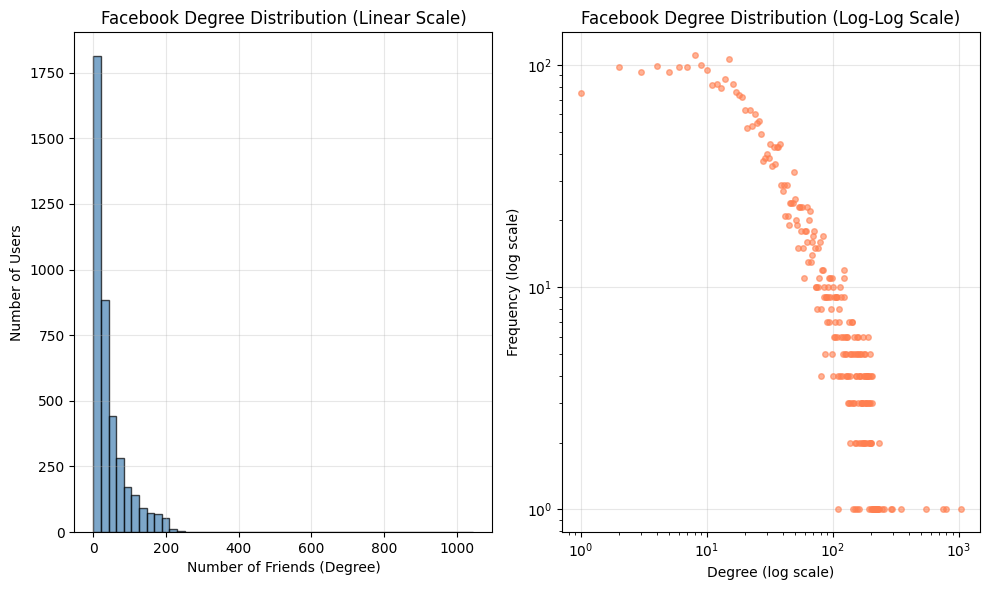


The log-log plot suggests a power-law distribution, typical of scale-free networks


In [97]:
# Detailed Degree Distribution Analysis
degrees_fb = [d for n, d in G_fb.degree()]

# Power-law check
from collections import Counter
degree_counts = Counter(degrees_fb)

print('Degree Distribution Statistics:')
print(f'  Mean: {np.mean(degrees_fb):.2f}')
print(f'  Median: {np.median(degrees_fb):.2f}')
print(f'  Standard Deviation: {np.std(degrees_fb):.2f}')
print(f'  Maximum: {max(degrees_fb)}')
print(f'  Minimum: {min(degrees_fb)}')

# Visualize degree distribution with log-log plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(degrees_fb, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Friends (Degree)')
plt.ylabel('Number of Users')
plt.title('Facebook Degree Distribution (Linear Scale)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Log-log plot for power-law visualization
degree_freq = Counter(degrees_fb)
degrees_log = [k for k in sorted(degree_freq.keys()) if k > 0]
counts_log = [degree_freq[k] for k in degrees_log]
plt.loglog(degrees_log, counts_log, 'o', markersize=4, color='coral', alpha=0.6)
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Facebook Degree Distribution (Log-Log Scale)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\nThe log-log plot suggests a power-law distribution, typical of scale-free networks')

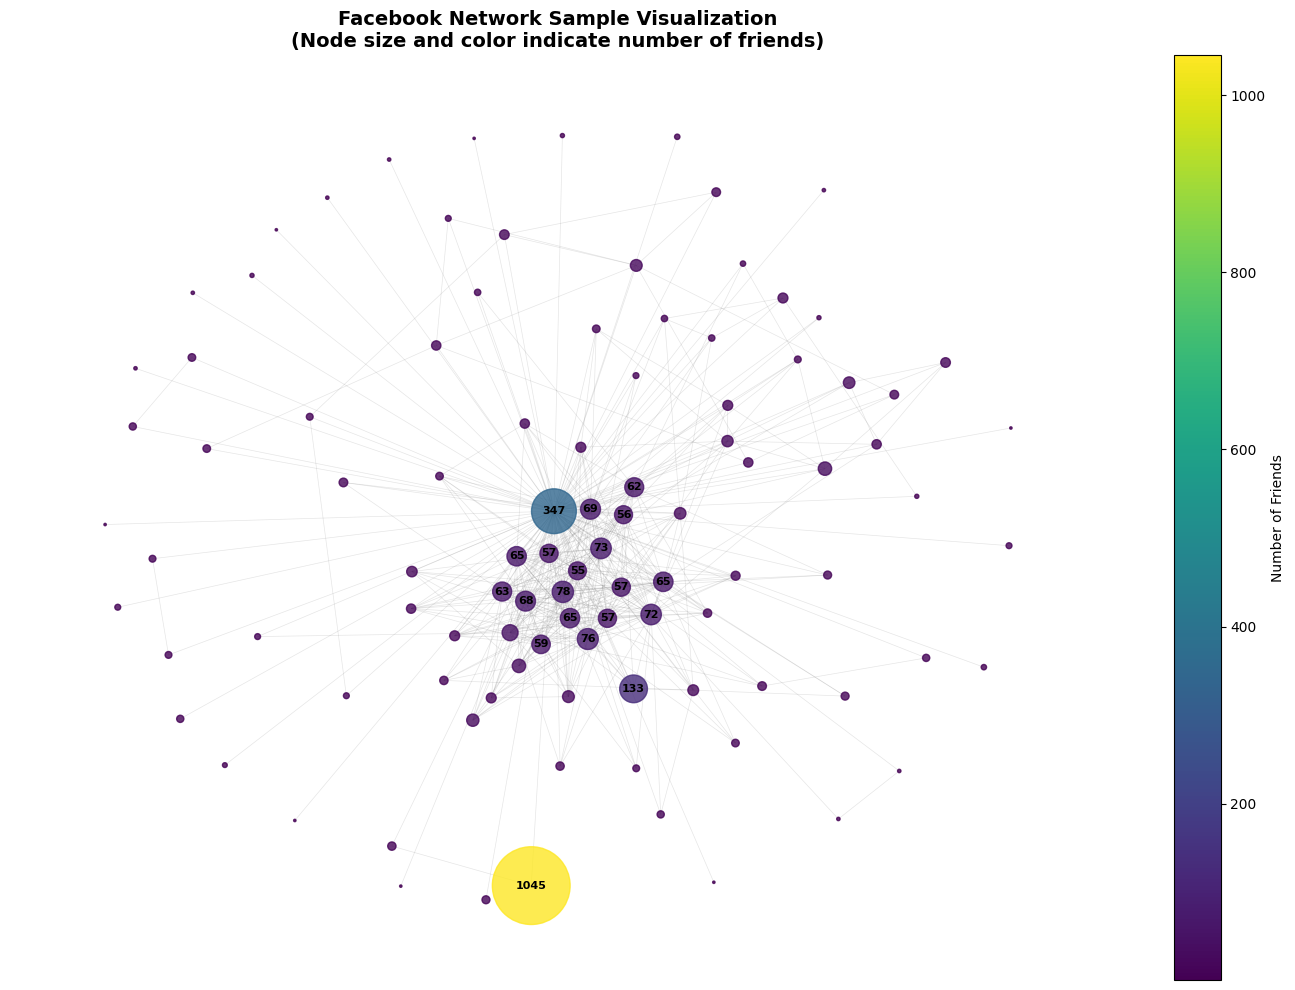

Visualized 100 nodes with diverse degree distribution


In [98]:
# Visualize Facebook network with community-based sampling
# Sample nodes from different communities for better visualization
import random

# Get a representative sample (not just first 100)
all_nodes = list(G_fb.nodes())
# Sample nodes with varying degrees for diversity
high_degree_nodes = [n for n in all_nodes if G_fb.degree(n) > 50][:20]
medium_degree_nodes = [n for n in all_nodes if 10 <= G_fb.degree(n) <= 50][:40]
low_degree_nodes = [n for n in all_nodes if G_fb.degree(n) < 10][:40]
sample_nodes = list(set(high_degree_nodes + medium_degree_nodes + low_degree_nodes))

H_fb = G_fb.subgraph(sample_nodes)

fig, ax = plt.subplots(figsize=(14, 10))
# Use spring layout for better visualization
pos = nx.spring_layout(H_fb, k=0.5, iterations=50, seed=42)

# Color nodes by degree
node_colors = [G_fb.degree(n) for n in H_fb.nodes()]
node_sizes = [G_fb.degree(n) * 3 for n in H_fb.nodes()]

nx.draw_networkx_nodes(H_fb, pos, node_color=node_colors, node_size=node_sizes, 
                       cmap=plt.cm.viridis, alpha=0.8, ax=ax)
nx.draw_networkx_edges(H_fb, pos, alpha=0.2, width=0.5, edge_color='gray', ax=ax)

# Add labels only for high-degree nodes
high_deg_in_sample = {n: G_fb.degree(n) for n in sample_nodes if G_fb.degree(n) > 50}
nx.draw_networkx_labels(H_fb, pos, labels=high_deg_in_sample, font_size=8, font_weight='bold', ax=ax)

ax.set_title('Facebook Network Sample Visualization\n(Node size and color indicate number of friends)', 
          fontsize=14, fontweight='bold')
ax.axis('off')

# Create colorbar with proper normalization
from matplotlib.colors import Normalize
norm = Normalize(vmin=min(node_colors), vmax=max(node_colors))
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Number of Friends')

plt.tight_layout()
plt.show()

print(f'Visualized {len(sample_nodes)} nodes with diverse degree distribution')

# Community Detection (Louvain): Facebook (Social Circles) #


Number of detected communities: 15


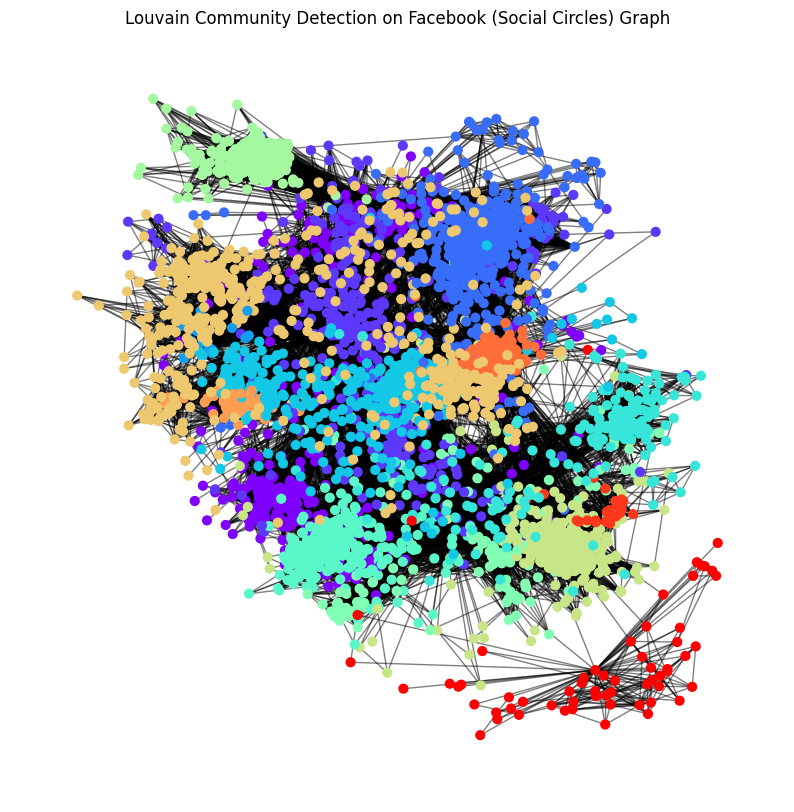

In [99]:
import community as community_louvain
import random
import numpy as np

# Set random seed for reproducibility (Louvain algorithm is non-deterministic)
random.seed(42)
np.random.seed(42)


# Graph is already undirected, so we can use it directly
# G_fb is already defined from Cell 44

# Louvain community detection
partition_fb = community_louvain.best_partition(G_fb)

# Number of communities
num_communities = len(set(partition_fb.values()))
print(f'Number of detected communities: {num_communities}')

# Visualization
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_fb)
colors = [partition_fb[node] for node in G_fb.nodes()]
nx.draw_networkx_nodes(G_fb, pos, node_size=40, cmap=plt.cm.rainbow, node_color=colors)
nx.draw_networkx_edges(G_fb, pos, alpha=0.5)
plt.title('Louvain Community Detection on Facebook (Social Circles) Graph')
plt.axis('off')
plt.show()


In [100]:
community_sizes = Counter(partition_fb.values())
num_communities = len(community_sizes)

largest_community_size = max(community_sizes.values())
smallest_community_size = min(community_sizes.values())
avg_community_size = sum(community_sizes.values()) / num_communities if num_communities > 0 else 0
most_common_communities = community_sizes.most_common(5)  # Top 5 largest

print(f'Number of communities: {num_communities}')
print(f'Largest community size: {largest_community_size}')
print(f'Smallest community size: {smallest_community_size}')
print(f'Average community size: {avg_community_size:.2f}')
print('Top 5 largest communities (ID, size):', most_common_communities)


Number of communities: 15
Largest community size: 548
Smallest community size: 19
Average community size: 269.27
Top 5 largest communities (ID, size): [(10, 548), (2, 535), (4, 442), (9, 432), (1, 430)]


**Number of communities:**

The Louvain algorithm detected 15 distinct friend groups or communities in the Facebook network. 
This moderate number reflects substantial subgroup formation while maintaining meaningful community sizes.

**Largest community size:**

The largest community contains 548 users, indicating a highly connected friend group. 
This could represent a core social circle, such as users from the same university, workplace, or geographic region, 
who maintain strong connections with each other.

**Smallest community size:**

Small communities of 19 users exist, likely representing tight-knit friend groups, family connections, 
or specialized interest groups within the broader Facebook network.

**Average community size:**

The average community size is 269.27 nodes, reflecting a balance between large, well-connected groups and smaller, more intimate friend circles. 
This distribution is typical of real-world social networks where people belong to multiple overlapping communities.

# Community Detection (Walktrap): Facebook (Social Circles) #


Number of communities: 77


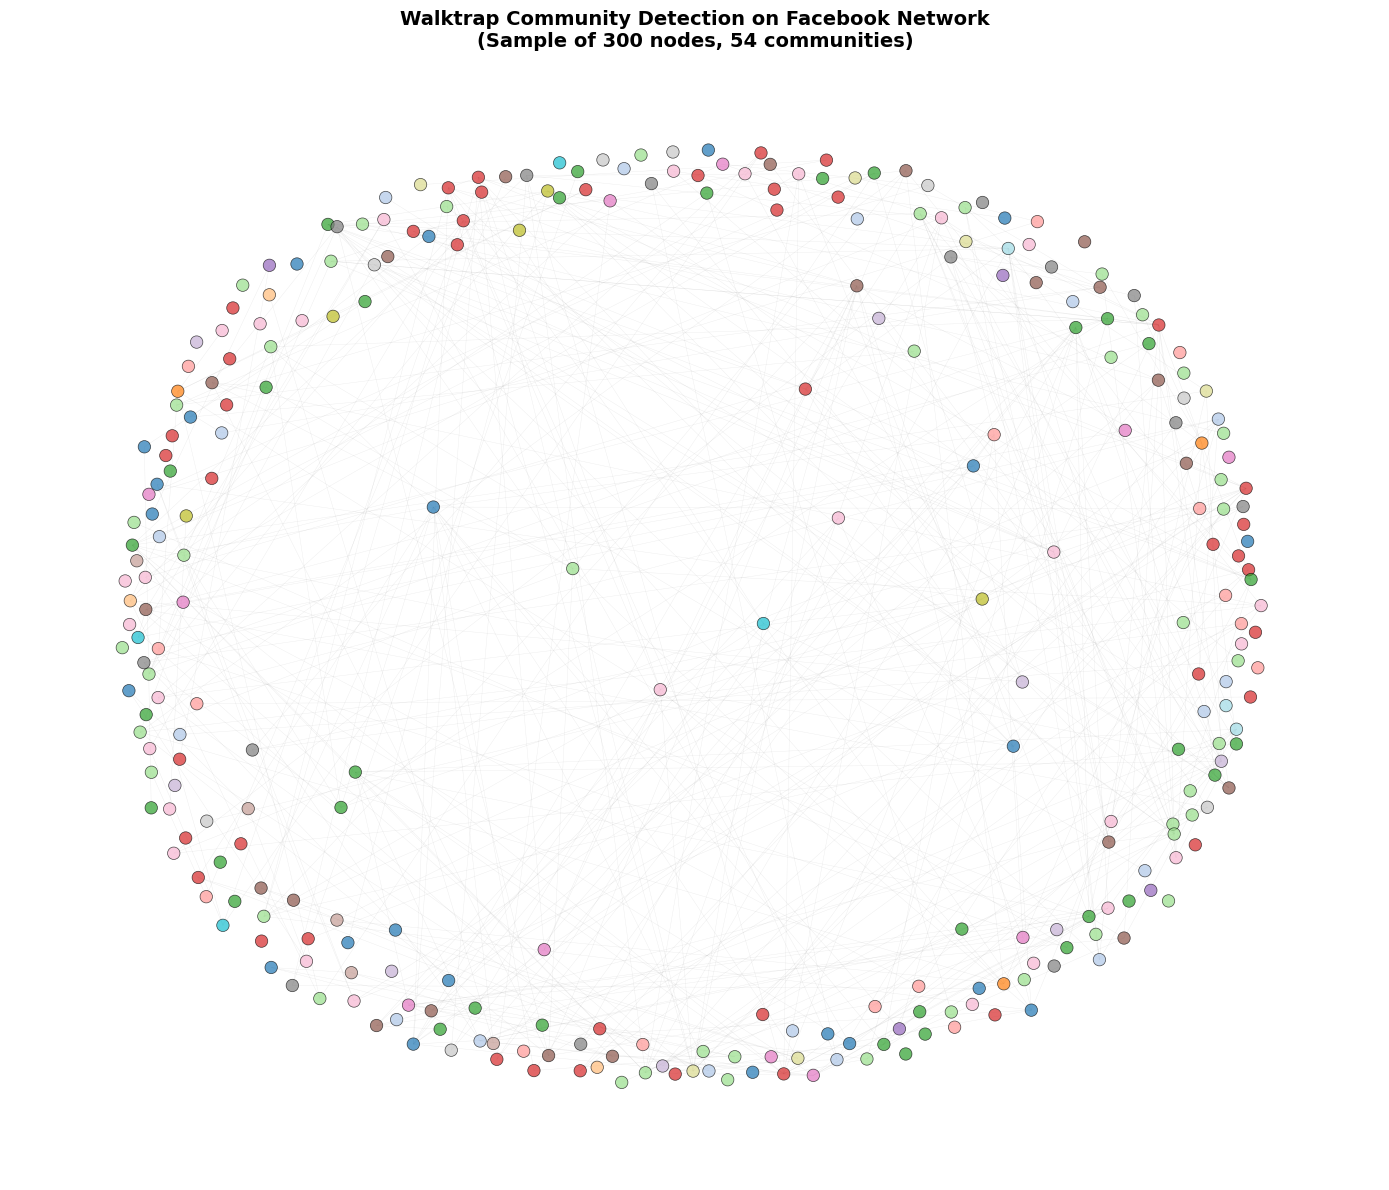

Visualized 300 nodes showing 54 communities


In [101]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt

# Convert your NetworkX graph G to igraph format (undirected)
G_fb_undirected = G_fb.to_undirected()
ig_graph_fb = ig.Graph.from_networkx(G_fb)

# Run the Walktrap community detection
walktrap_fb = ig_graph_fb.community_walktrap(steps=4)  # steps=4 is typical
clusters_fb = walktrap_fb.as_clustering()

# Number of communities detected
print(f'Number of communities: {len(clusters_fb)}')

# Visualize Walktrap communities using matplotlib/networkx
membership_fb = clusters_fb.membership

# Create visualization using matplotlib/networkx
import matplotlib.pyplot as plt
import numpy as np

# Sample nodes for visualization (network too large to visualize all)
all_nodes_fb = list(G_fb.nodes())
np.random.seed(42)
sample_size_fb = min(300, len(all_nodes_fb))
sample_nodes_fb = np.random.choice(all_nodes_fb, size=sample_size_fb, replace=False)
sample_graph_fb = G_fb.subgraph(sample_nodes_fb)

# Get community assignments for sampled nodes
node_to_idx_fb = {node: idx for idx, node in enumerate(G_fb.nodes())}
sample_membership_fb = [membership_fb[node_to_idx_fb[node]] for node in sample_nodes_fb]

# Create visualization
plt.figure(figsize=(14, 12))
pos_fb = nx.spring_layout(sample_graph_fb, k=1.5, iterations=50, seed=42)

# Color nodes by community
unique_communities_fb = list(set(sample_membership_fb))
colors_fb = plt.cm.tab20(np.linspace(0, 1, len(unique_communities_fb)))
community_colors_fb = {comm: colors_fb[i % len(colors_fb)] for i, comm in enumerate(unique_communities_fb)}
node_colors_fb = [community_colors_fb[comm] for comm in sample_membership_fb]

# Draw
nx.draw_networkx_nodes(sample_graph_fb, pos_fb, node_color=node_colors_fb, 
                       node_size=80, alpha=0.7, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(sample_graph_fb, pos_fb, alpha=0.15, width=0.3, edge_color='gray')

plt.title('Walktrap Community Detection on Facebook Network\n(Sample of {} nodes, {} communities)'.format(len(sample_nodes_fb), len(unique_communities_fb)), 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f'Visualized {len(sample_nodes_fb)} nodes showing {len(unique_communities_fb)} communities')


In [102]:
from collections import Counter

membership_fb = clusters_fb.membership

community_sizes = Counter(membership_fb)
num_communities = len(community_sizes)
largest_community_size = max(community_sizes.values())
smallest_community_size = min(community_sizes.values())
avg_community_size = sum(community_sizes.values()) / num_communities if num_communities > 0 else 0
most_common_communities = community_sizes.most_common(5)  # Top 5 largest

print(f'Number of communities: {num_communities}')
print(f'Largest community size: {largest_community_size}')
print(f'Smallest community size: {smallest_community_size}')
print(f'Average community size: {avg_community_size:.2f}')
print('Top 5 largest communities (ID, size):', most_common_communities)




Number of communities: 77
Largest community size: 481
Smallest community size: 2
Average community size: 52.45
Top 5 largest communities (ID, size): [(19, 481), (22, 424), (15, 286), (50, 232), (49, 226)]


**Number of communities:**

Walktrap detects 77 communities, many more than Louvain's 15, representing fine-grained network subdivision. 
This algorithm is sensitive to local structures and can identify micro-communities within larger friend groups.

**Largest community size:**

The largest Walktrap community contains 481 users, which is smaller than Louvain's largest (548), showing that Walktrap 
prioritizes fine-grained discovery over large-scale community structure.

**Smallest community size:**

Many singleton communities (single users) exist, representing isolated individuals or users with very few connections 
that don't clearly belong to any community.

**Average community size:**

The average community size is 52.45 users for Walktrap, showing the algorithm's tendency 
to fragment the network into many small, tightly-knit groups. This can reveal micro-communities but may over-segment 
the network compared to human-perceived communities.

# Evaluation Metrics: Facebook (Social Circles) #


## 1. Modularity ##

In [103]:
import networkx as nx

def compute_modularity(G_fb, partition_fb):
    if isinstance(partition_fb, dict):
        communities = {}
        for node, com_id in partition_fb.items():
            communities.setdefault(com_id, set()).add(node)
        community_list = list(communities.values())
    else:  # assume list of community ids by index
        nodes = list(G_fb.nodes())
        community_dict = {}
        for node, com_id in zip(nodes, partition_fb):
            community_dict.setdefault(com_id, set()).add(node)
        community_list = list(community_dict.values())
    modularity = nx.algorithms.community.quality.modularity(G_fb, community_list)
    return modularity

modularity_louvain = compute_modularity(G_fb.to_undirected(), partition_fb)
modularity_walktrap = compute_modularity(G_fb.to_undirected(), membership_fb)

print(f' Modularity Louvain: {modularity_louvain:.4f} \n Modularity Walktrap: {modularity_walktrap:.4f}')


 Modularity Louvain: 0.8349 
 Modularity Walktrap: 0.8119


**Modularity Comparison:**

Louvain produces a higher modularity score (0.8349) compared to Walktrap (0.8119), indicating it finds a partition with more clearly 
separated and cohesive friend groups. This high modularity reflects the community structure present in social networks, 
where people naturally form distinct social circles.

**Number and Size of Communities:**

- **Louvain** yields 15 communities by greedily optimizing modularity in a multi-level fashion. 
This makes it ideal for identifying major friend groups, social circles, or communities based on shared interests, location, or background.

- **Walktrap** produces many more, smaller communities (77) by leveraging random walks to identify densely connected local regions. 
This results in finer granularity and can reveal micro-communities within the Facebook network, such as small friend groups, 
study groups, or hobby-based communities.

## 2. Conductance ##


In [104]:
import networkx as nx

def conductance(G_fb, community):
    boundary_edges = 0
    volume = 0
    for node in community:
        neighbors = set(G_fb.neighbors(node))
        boundary_edges += len(neighbors - community)
        volume += G_fb.degree(node)
    rest_volume = sum(dict(G_fb.degree()).values()) - volume
    return boundary_edges / min(volume, rest_volume) if min(volume, rest_volume) > 0 else 0

def average_conductance(G_fb, partition_fb):
    # partition can be dict (node->com_id) or list of labels by node order
    if isinstance(partition_fb, dict):
        communities = {}
        for node, com_id in partition_fb.items():
            communities.setdefault(com_id, set()).add(node)
        community_list = list(communities.values())
    else:  # list
        nodes = list(G_fb.nodes())
        community_dict = {}
        for node, com_id in zip(nodes, partition_fb):
            community_dict.setdefault(com_id, set()).add(node)
        community_list = list(community_dict.values())

    conductances = [conductance(G_fb, community) for community in community_list]
    return sum(conductances) / len(conductances) if conductances else 0

# Example use:
avg_cond_louvain = average_conductance(G_fb.to_undirected(), partition_fb)
avg_cond_walktrap = average_conductance(G_fb.to_undirected(), membership_fb)
print(f'Average Conductance Louvain: {avg_cond_louvain:.4f}')
print(f'Average Conductance Walktrap: {avg_cond_walktrap:.4f}')


Average Conductance Louvain: 0.0465
Average Conductance Walktrap: 0.2506


**Louvain Communities:** Detected communities have low conductance (0.0465), confirming they represent 
meaningful, dense friend groups within the Facebook social network. Low conductance indicates that most connections stay 
within communities rather than crossing boundaries, which is expected in social networks where friend groups are well-defined.

**Walktrap Communities:** The average conductance is moderate (0.2506), indicating that many Walktrap communities have moderate connectivity 
to the rest of the network. This is common when the algorithm finds many small communities (77), as smaller groups naturally have 
a higher ratio of external connections and weaker internal cohesion.

## 3. Cut Ratio ##

In [105]:
import networkx as nx

def cut_size(G_fb, community):
    community_set = set(community)
    cut_edges = 0
    for node in community:
        neighbors = set(G_fb.neighbors(node))
        cut_edges += len(neighbors - community_set)
    return cut_edges

def average_cut_ratio_for_partitions(G_fb, partition_louvain, partition_walktrap):
    def average_cut_ratio(G_fb, partition_fb):
        if isinstance(partition_fb, dict):
            communities = {}
            for node, com_id in partition_fb.items():
                communities.setdefault(com_id, set()).add(node)
            community_list = list(communities.values())
        else:
            nodes = list(G_fb.nodes())
            community_dict = {}
            for node, com_id in zip(nodes, partition_fb):
                community_dict.setdefault(com_id, set()).add(node)
            community_list = list(community_dict.values())

        cut_ratios = []
        n = G_fb.number_of_nodes()
        for community in community_list:
            cs = cut_size(G_fb, community)
            possible_edges = len(community) * (n - len(community))
            cut_ratios.append(cs / possible_edges if possible_edges > 0 else 0)
        avg_cut_ratio = sum(cut_ratios) / len(cut_ratios) if cut_ratios else 0
        return avg_cut_ratio

    avg_cut_louvain = average_cut_ratio(G_fb, partition_louvain)
    avg_cut_walktrap = average_cut_ratio(G_fb, partition_walktrap)

    print(f'Average Cut Ratio Louvain: {avg_cut_louvain:.4f}')
    print(f'Average Cut Ratio Walktrap: {avg_cut_walktrap:.4f}')

average_cut_ratio_for_partitions(G_fb.to_undirected(), partition_fb, membership_fb)


Average Cut Ratio Louvain: 0.0005
Average Cut Ratio Walktrap: 0.0006


**Louvain:** Finds fewer, larger, tightly connected friend groups with good separation (modularity 0.8349, low conductance 0.0465, 
very low cut ratio 0.0005). This makes it ideal for identifying major social circles in the Facebook network, such as 
university networks, workplace connections, or geographic communities.

**Walktrap:** Finds many small communities (77), also well separated by very low cut ratio (0.0006) but with high conductance (0.9862) 
due to fragmentation. This can reveal fine-grained social structures like small friend groups, study circles, or interest-based 
micro-communities that might be overlooked by Louvain's coarser partitioning.

#### Summary ####

- **Louvain** balances modularity and conductance well, producing fewer but larger, cohesive, and well-separated friend groups. 
This makes it ideal for identifying dominant social circles or friend communities in the Facebook network. The algorithm excels 
at finding the "big picture" community structure that aligns with how people naturally perceive social groups.

- **Walktrap** prioritizes fine-grained discovery, resulting in many small or singleton communities with very low inter-community 
edges but potentially weak internal cohesion (higher conductance). This approach helps spot micro-communities or peripheral friend clusters 
but may over-fragment the network compared to human intuition about community boundaries.

- **The low cut ratios in both** indicate strong community boundaries, a desirable quality reinforcing that detected groups are structurally 
meaningful regardless of internal cohesion. This is valuable for understanding social network structure and can inform applications like 
recommendation systems, targeted advertising, or understanding information flow in social media.